In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import time
from data_utils import *


from data_utils import load_train_test_data
from src.feature_extraction import AutoencoderExtractor

# Load data

In [4]:
(X_train, X_test, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, return_classes=True, standardize=True, norm=False, include_categorical=False)

In [5]:
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])
nsl_lables = np.argmax(Y[:], axis=1)

# Utils

In [6]:
extractor = AutoencoderExtractor(16, root=pwd)

2022-05-14 13:09:44.605575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-14 13:09:44.605896: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [10]:
extracted_features = extractor.extract_features(X)

In [12]:
extracted_features.shape

(148517, 16)

In [15]:
RUN_ALGORITHMS = True

# TSNE

In [20]:
titles_tsne_nsl = [
    'perplexity=5',
    'perplexity=30',
    'perplexity=80',
    'perplexity=120',
    'perplexity=160'
][3:4]

if RUN_ALGORITHMS:
    tsne_list_nsl = [
        TSNE(perplexity=5, n_components=2, random_state=42),
        TSNE(perplexity=30, n_components=2, random_state=42),
        TSNE(perplexity=80, n_components=2, random_state=42),
        TSNE(perplexity=120, n_components=2, random_state=42),
        TSNE(perplexity=160, n_components=2, random_state=42)
    ][3:4]

    X_nsl_tsne = []
    for i, tsne in enumerate(tsne_list_nsl):
        print(f'Starting {titles_tsne_nsl[i]}, ', end='')
        X_nsl_tsne.append(run_and_measure(tsne.fit_transform, extracted_features[:50000]))

    np.save(pwd + '/data/saved_X/X_nsl_tsne_without_categorical_extracted.npy', np.array(X_nsl_tsne))

else:
    X_nsl_tsne = np.load(pwd + '/data/saved_X/X_nsl_tsne_without_categorical_extracted.npy')

Starting perplexity=120, 

/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kamil/Documents/tensorflow-test/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


192.67 s


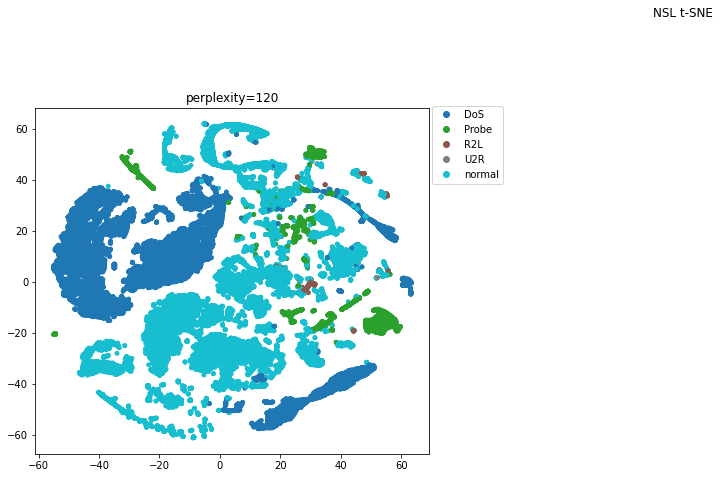

In [22]:
plot_2d(X_nsl_tsne, nsl_lables[:50000], titles_tsne_nsl, 'NSL t-SNE', labels=attack_classes, bbox_shift=1.2, rows=2, figsize=(24, 14))

In [27]:
X_nsl_tsne[0].shape

(50000, 2)

In [23]:
extractor2 = AutoencoderExtractor(2, root=pwd)

In [30]:
extracted_features = extractor2.extract_features(X)

2022-05-14 13:25:36.390157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [31]:
extracted_features.shape

(148517, 2)

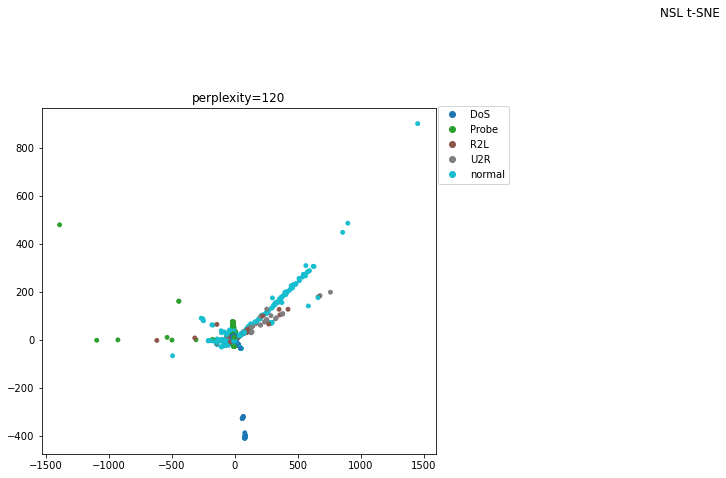

In [32]:
plot_2d([extracted_features], nsl_lables, titles_tsne_nsl, 'NSL t-SNE', labels=attack_classes, bbox_shift=1.2, rows=2, figsize=(24, 14))